In [3]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

dataset = fetch_openml("mnist_784", as_frame=False)
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 60000, random_state=42)


In [9]:
rnd_clf = RandomForestClassifier(random_state=42, n_jobs = -1)
rnd_clf.fit(X_train, y_train)
rnd_clf.score(X_test, y_test)

0.9674

In [8]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    PCA(n_components=0.95, random_state=42), 
    RandomForestClassifier(random_state = 42, n_jobs = -1)
    )

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.9487

In [10]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42, n_jobs = -1)
sgd.fit(X_train, y_train)
sgd.score(X_test, y_test)

0.8691

In [11]:
sgdpipeline = make_pipeline(
    PCA(n_components = 0.95, random_state=42),
    SGDClassifier(random_state = 42, n_jobs = -1),
)
sgdpipeline.fit(X_train, y_train)
sgdpipeline.score(X_test, y_test)

0.8907

In [12]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

small_X = X[:5000]
small_y = y[:5000]
tsne = TSNE(n_components = 2)
small_X_2d = tsne.fit_transform(small_X)

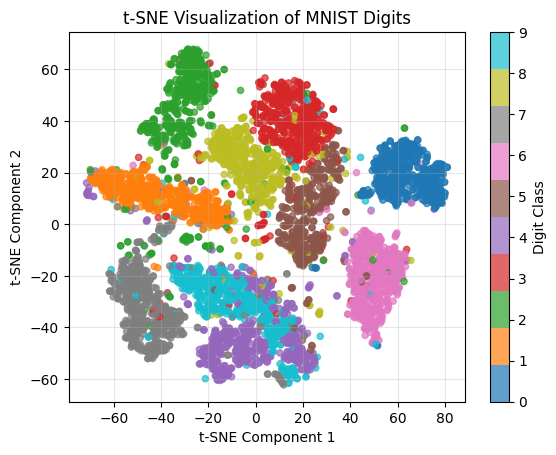

In [20]:
scatter = plt.scatter(small_X_2d[:, 0], small_X_2d[:, 1],
            c = small_y.astype(int),
            cmap = "tab10",
            alpha = 0.7,
            s = 20)
plt.colorbar(scatter, label='Digit Class')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of MNIST Digits')
plt.grid(True, alpha=0.3)
plt.show()

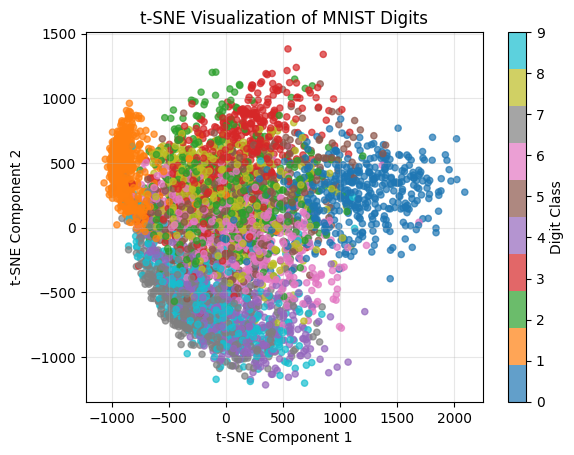

In [ ]:
pca = PCA(n_components = 2, random_state = 42)
small_X_2d_pca = pca.fit_transform(small_X)
scatter_pca = plt.scatter(small_X_2d_pca[:, 0], small_X_2d_pca[:, 1],
            c = small_y.astype(int),
            cmap = "tab10",
            alpha = 0.7,
            s = 20)
plt.colorbar(scatter_pca, label='Digit Class')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of MNIST Digits')
plt.grid(True, alpha=0.3)
plt.show()

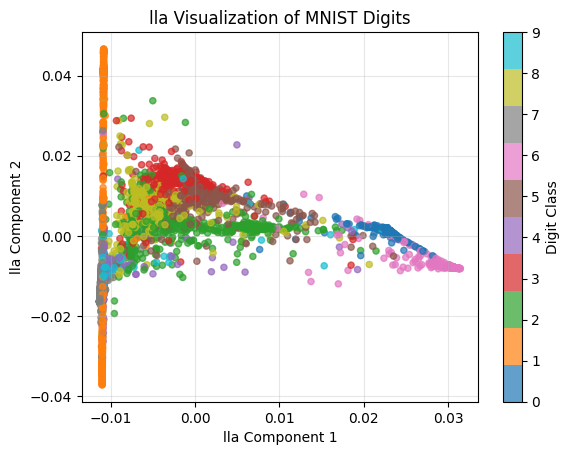

In [24]:
from sklearn.manifold import LocallyLinearEmbedding
lla = LocallyLinearEmbedding(n_components = 2, random_state = 42)
small_X_2d_lla = lla.fit_transform(small_X)
scatter_lla = plt.scatter(small_X_2d_lla[:, 0], small_X_2d_lla[:, 1],
            c = small_y.astype(int),
            cmap = "tab10",
            alpha = 0.7,
            s = 20)
plt.colorbar(scatter_lla, label='Digit Class')
plt.xlabel('lla Component 1')
plt.ylabel('lla Component 2')
plt.title('lla Visualization of MNIST Digits')
plt.grid(True, alpha=0.3)
plt.show()

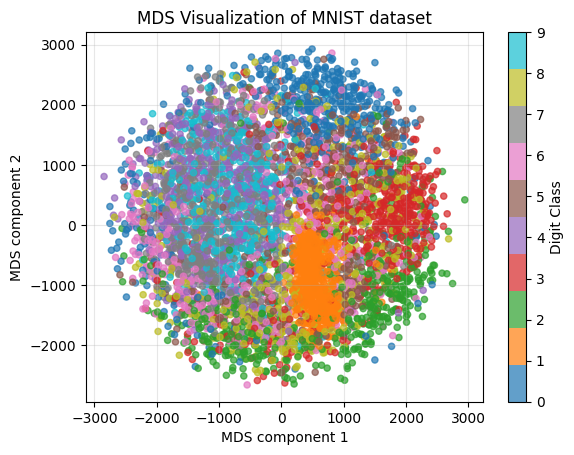

In [28]:
from sklearn.manifold import MDS
mds = MDS(n_components=2, random_state=42, n_init=1, n_jobs = -1)
small_x_2d_mds = mds.fit_transform(small_X)
scatter_mds = plt.scatter(small_x_2d_mds[:, 0], small_x_2d_mds[:, 1],
                          c = small_y.astype(int),
                          cmap = "tab10",
                          alpha = 0.7,
                          s = 20)
plt.colorbar(scatter_mds, label='Digit Class')
plt.xlabel("MDS component 1")
plt.ylabel("MDS component 2")
plt.title("MDS Visualization of MNIST dataset")
plt.grid(True, alpha=0.3)
plt.show()